# Predicting COVID-19 With Machine Learning 

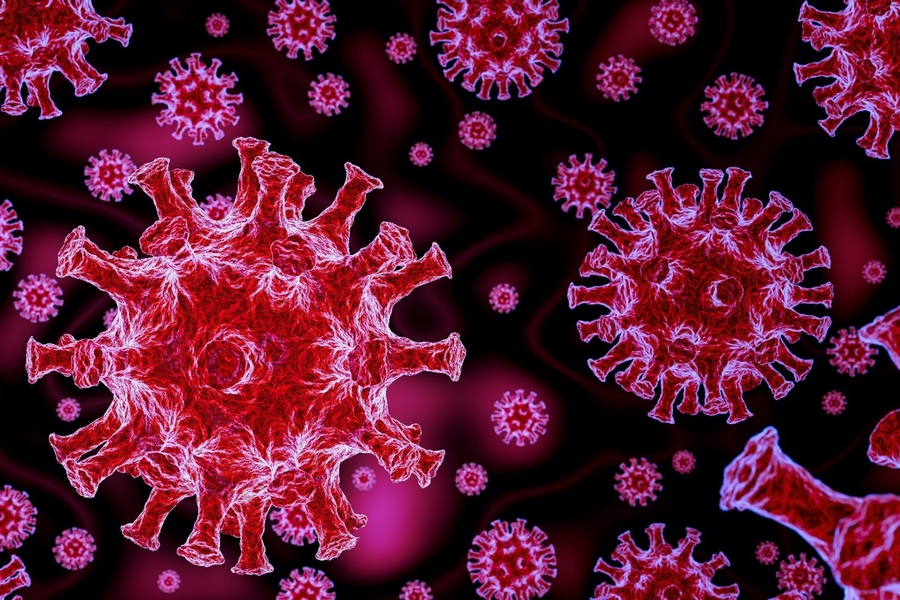

In [1]:
# install the dependencies
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt

In [2]:
#Load the data
covid=pd.read_excel("C:\\Users\\Pranav\\Desktop\\DATA SCIENCE DATA\\Excel file\\907654-covid.xlsx")

In [3]:
covid.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2.0,2.0,0.0,0.0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4.0,2.0,0.0,0.0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12.0,8.0,0.0,0.0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17.0,5.0,0.0,0.0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19.0,2.0,0.0,0.0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [4]:
#to see the last five rows
covid.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
19491,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19492,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19493,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19494,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19495,NaN,International,2020-03-10,696.0,-9.0,7.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# shape of dataset
covid.shape

(19496, 32)

In [6]:
# information about dataset
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19496 entries, 0 to 19495
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         19432 non-null  object        
 1   location                         19496 non-null  object        
 2   date                             19496 non-null  datetime64[ns]
 3   total_cases                      19496 non-null  float64       
 4   new_cases                        19496 non-null  float64       
 5   total_deaths                     19496 non-null  float64       
 6   new_deaths                       19496 non-null  float64       
 7   total_cases_per_million          19119 non-null  float64       
 8   new_cases_per_million            19119 non-null  float64       
 9   total_deaths_per_million         19119 non-null  float64       
 10  new_deaths_per_million           19119 non-null  float64  

In [7]:
#Describe of dataset
covid.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
count,1.949600e+04,19496.000000,19496.000000,19496.000000,19119.000000,19119.000000,19119.000000,19119.000000,5.164000e+03,4592.000000,...,17516.000000,17664.000000,17514.000000,11618.000000,17679.000000,18322.000000,14444.000000,14290.000000,7674.000000,16336.000000
mean,1.752634e+04,540.990152,1162.475739,35.055601,499.008529,13.312513,21.855009,0.585176,2.466140e+05,10273.971690,...,9.922658,6.322441,23347.911758,10.004596,244.735053,8.006378,11.353923,32.639889,55.563306,3.238098
std,1.808525e+05,4858.071697,12377.578661,334.755956,1458.509832,63.749619,92.098024,3.604289,8.946899e+05,34126.717986,...,6.478670,4.452068,21417.397147,17.425455,119.087724,4.019256,10.575776,13.190948,30.870108,2.616300
min,0.000000e+00,-2461.000000,0.000000,0.000000,0.000000,-265.189000,0.000000,0.000000,1.000000e+00,1.000000,...,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000
25%,5.000000e+00,0.000000,0.000000,0.000000,0.593000,0.000000,0.000000,0.000000,8.090250e+03,538.500000,...,4.031000,2.380000,6885.829000,0.500000,145.183000,5.310000,1.900000,21.400000,24.640000,1.400000
50%,8.400000e+01,2.000000,1.000000,0.000000,26.720000,0.246000,0.167000,0.000000,4.302400e+04,1946.000000,...,7.846500,5.021000,15847.419000,1.500000,233.070000,7.110000,7.100000,31.400000,59.607000,2.600000
75%,1.135250e+03,43.000000,24.000000,1.000000,252.172000,5.857500,4.538500,0.054000,1.535690e+05,6233.250000,...,15.413000,9.842000,35938.374000,10.000000,311.110000,10.080000,20.000000,40.800000,84.169000,4.280000
max,5.273572e+06,107909.000000,341722.000000,10520.000000,19594.555000,4944.376000,1237.551000,200.040000,1.378479e+07,416546.000000,...,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000


In [8]:
# find ot null value in dataset
covid.isnull().sum()

iso_code                              64
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million              377
new_cases_per_million                377
total_deaths_per_million             377
new_deaths_per_million               377
total_tests                        14332
new_tests                          14904
total_tests_per_thousand           14332
new_tests_per_thousand             14904
new_tests_smoothed                 13866
new_tests_smoothed_per_thousand    13866
tests_units                        13267
stringency_index                    4500
population                            64
population_density                   850
median_age                          1743
aged_65_older                       1980
aged_70_older                       1832
gdp_per_capita  

In [9]:
# index of dataset
covid.index

RangeIndex(start=0, stop=19496, step=1)

In [10]:
# Dtypes of dataset
covid.dtypes

iso_code                                   object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
total_deaths                              float64
new_deaths                                float64
total_cases_per_million                   float64
new_cases_per_million                     float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
total_tests                               float64
new_tests                                 float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64
new_tests_smoothed_per_thousand           float64
tests_units                                object
stringency_index                          float64
population                                float64


In [11]:
# Looking at the different location
covid['location'].value_counts()

Sweden            146
Canada            146
United States     146
Lithuania         146
Brazil            146
                 ... 
Yemen              45
Western Sahara     29
Tajikistan         24
Comoros            23
Lesotho            10
Name: location, Length: 212, dtype: int64

In [12]:
#Checking the columns have a null values
covid.isna().any()

iso_code                            True
location                           False
date                               False
total_cases                        False
new_cases                          False
total_deaths                       False
new_deaths                         False
total_cases_per_million             True
new_cases_per_million               True
total_deaths_per_million            True
new_deaths_per_million              True
total_tests                         True
new_tests                           True
total_tests_per_thousand            True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
tests_units                         True
stringency_index                    True
population                          True
population_density                  True
median_age                          True
aged_65_older                       True
aged_70_older                       True
gdp_per_capita  

In [13]:
#Getting the null value across each column
covid.isna().sum()

iso_code                              64
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million              377
new_cases_per_million                377
total_deaths_per_million             377
new_deaths_per_million               377
total_tests                        14332
new_tests                          14904
total_tests_per_thousand           14332
new_tests_per_thousand             14904
new_tests_smoothed                 13866
new_tests_smoothed_per_thousand    13866
tests_units                        13267
stringency_index                    4500
population                            64
population_density                   850
median_age                          1743
aged_65_older                       1980
aged_70_older                       1832
gdp_per_capita  

In [14]:
#Getting the cases in india 
india_case=covid[covid["location"]=="India"]

In [15]:
india_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


## Visualization

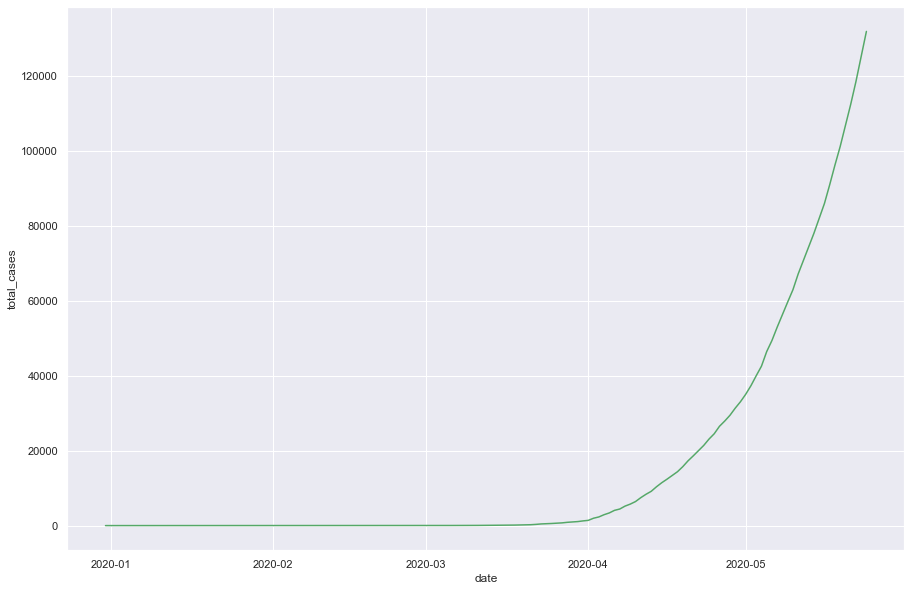

In [16]:
# total cases per day 
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date',y='total_cases',data=india_case,color='g')
plt.grid(True)
plt.show()

In [17]:
# Last five rows in Dataframe
india_last_5_days=india_case.tail()

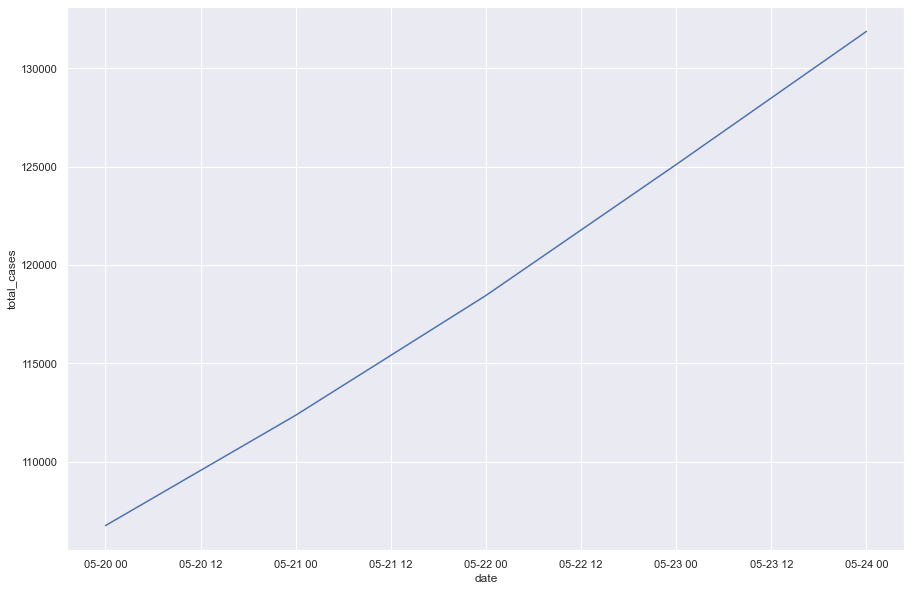

In [18]:
# total cases last five  day 
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date',y='total_cases',data=india_last_5_days)
plt.grid(True)
plt.show()

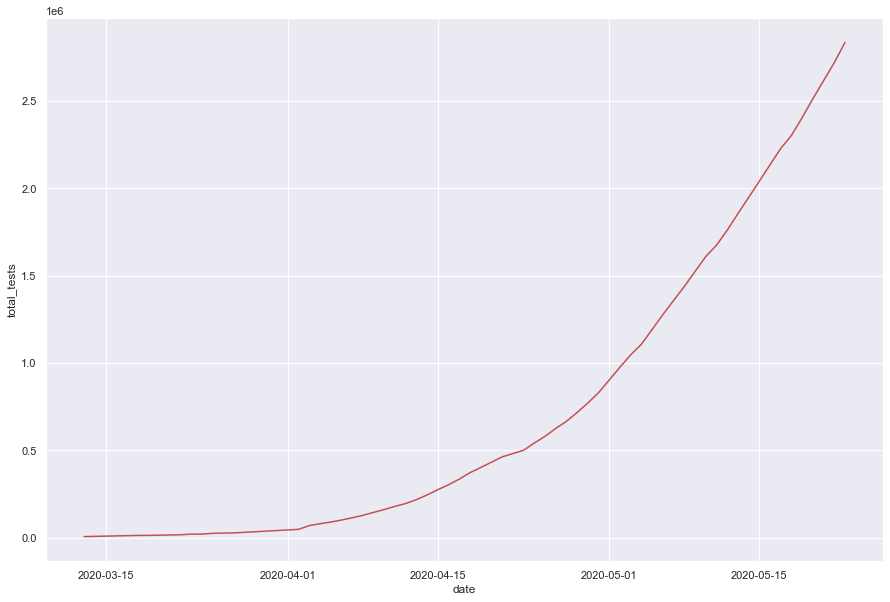

In [19]:
# total tastes per day 
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date',y='total_tests',data=india_case,color='r')
plt.grid(True)
plt.show()

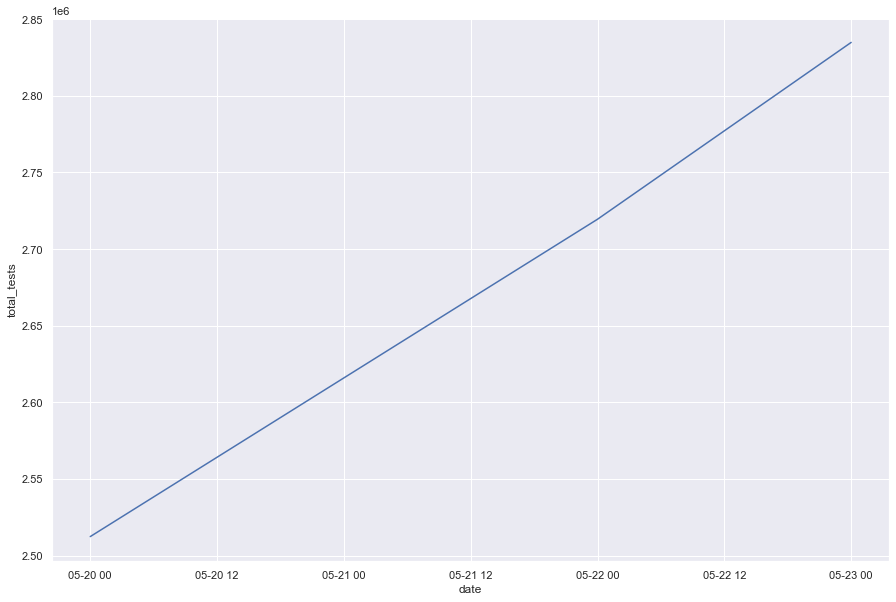

In [20]:
# total cases last five  day 
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date',y='total_tests',data=india_last_5_days)
plt.grid(True)
plt.show()

In [21]:
#Getting the cases in Brazil             
Brazil_case=covid[covid["location"]=="Brazil"]

In [22]:
Brazil_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
2510,BRA,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2511,BRA,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2512,BRA,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2513,BRA,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2514,BRA,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


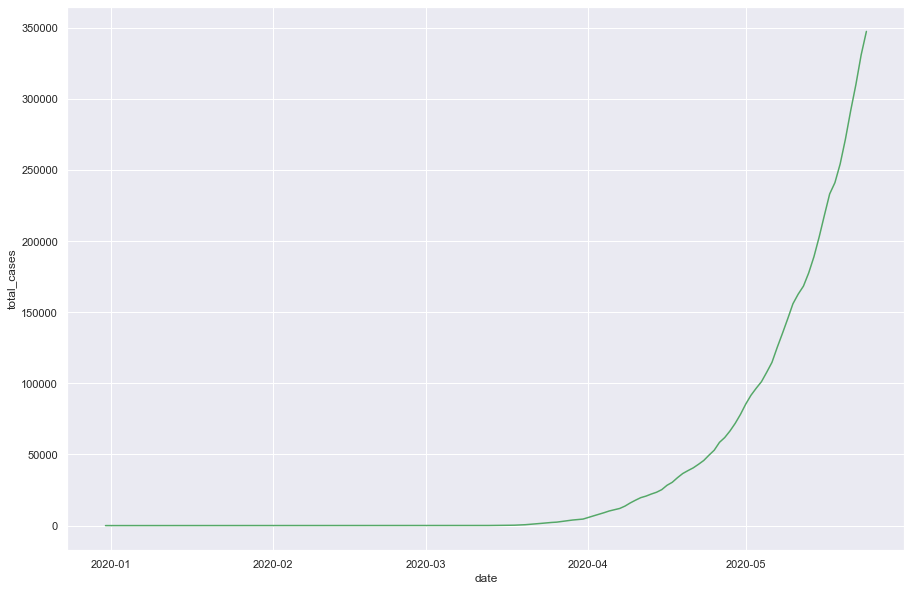

In [23]:
# total cases per day 
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date',y='total_cases',data=Brazil_case,color='g')
plt.grid(True)
plt.show()

In [24]:
# Last five rows in Dataframe
Brazil_last_5_days=Brazil_case.tail()

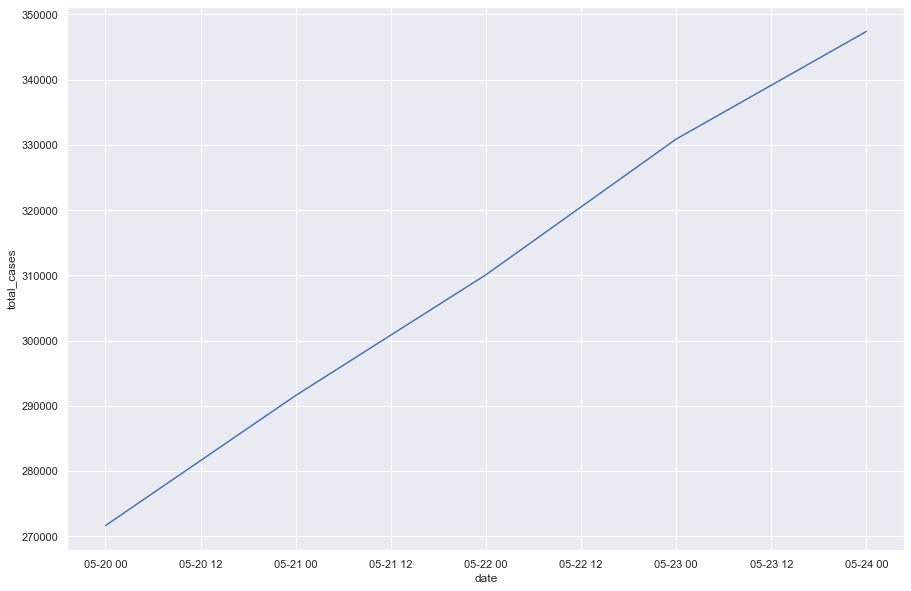

In [25]:
# total cases last five  day 
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date',y='total_cases',data=Brazil_last_5_days)
plt.grid(True)
plt.show()

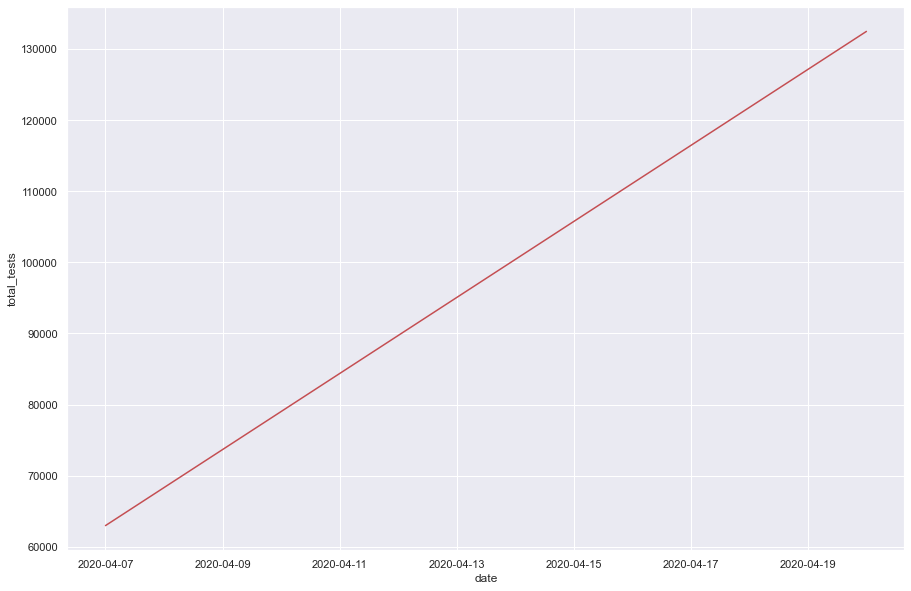

In [26]:
# total tastes per day 
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date',y='total_tests',data=Brazil_case,color='r')
plt.grid(True)
plt.show()

## Understanding cases of India ,China & Japan

In [27]:
india_japan_china=covid[(covid["location"]=="India") | (covid["location"]=="Japan") | (covid["location"]=="China")]

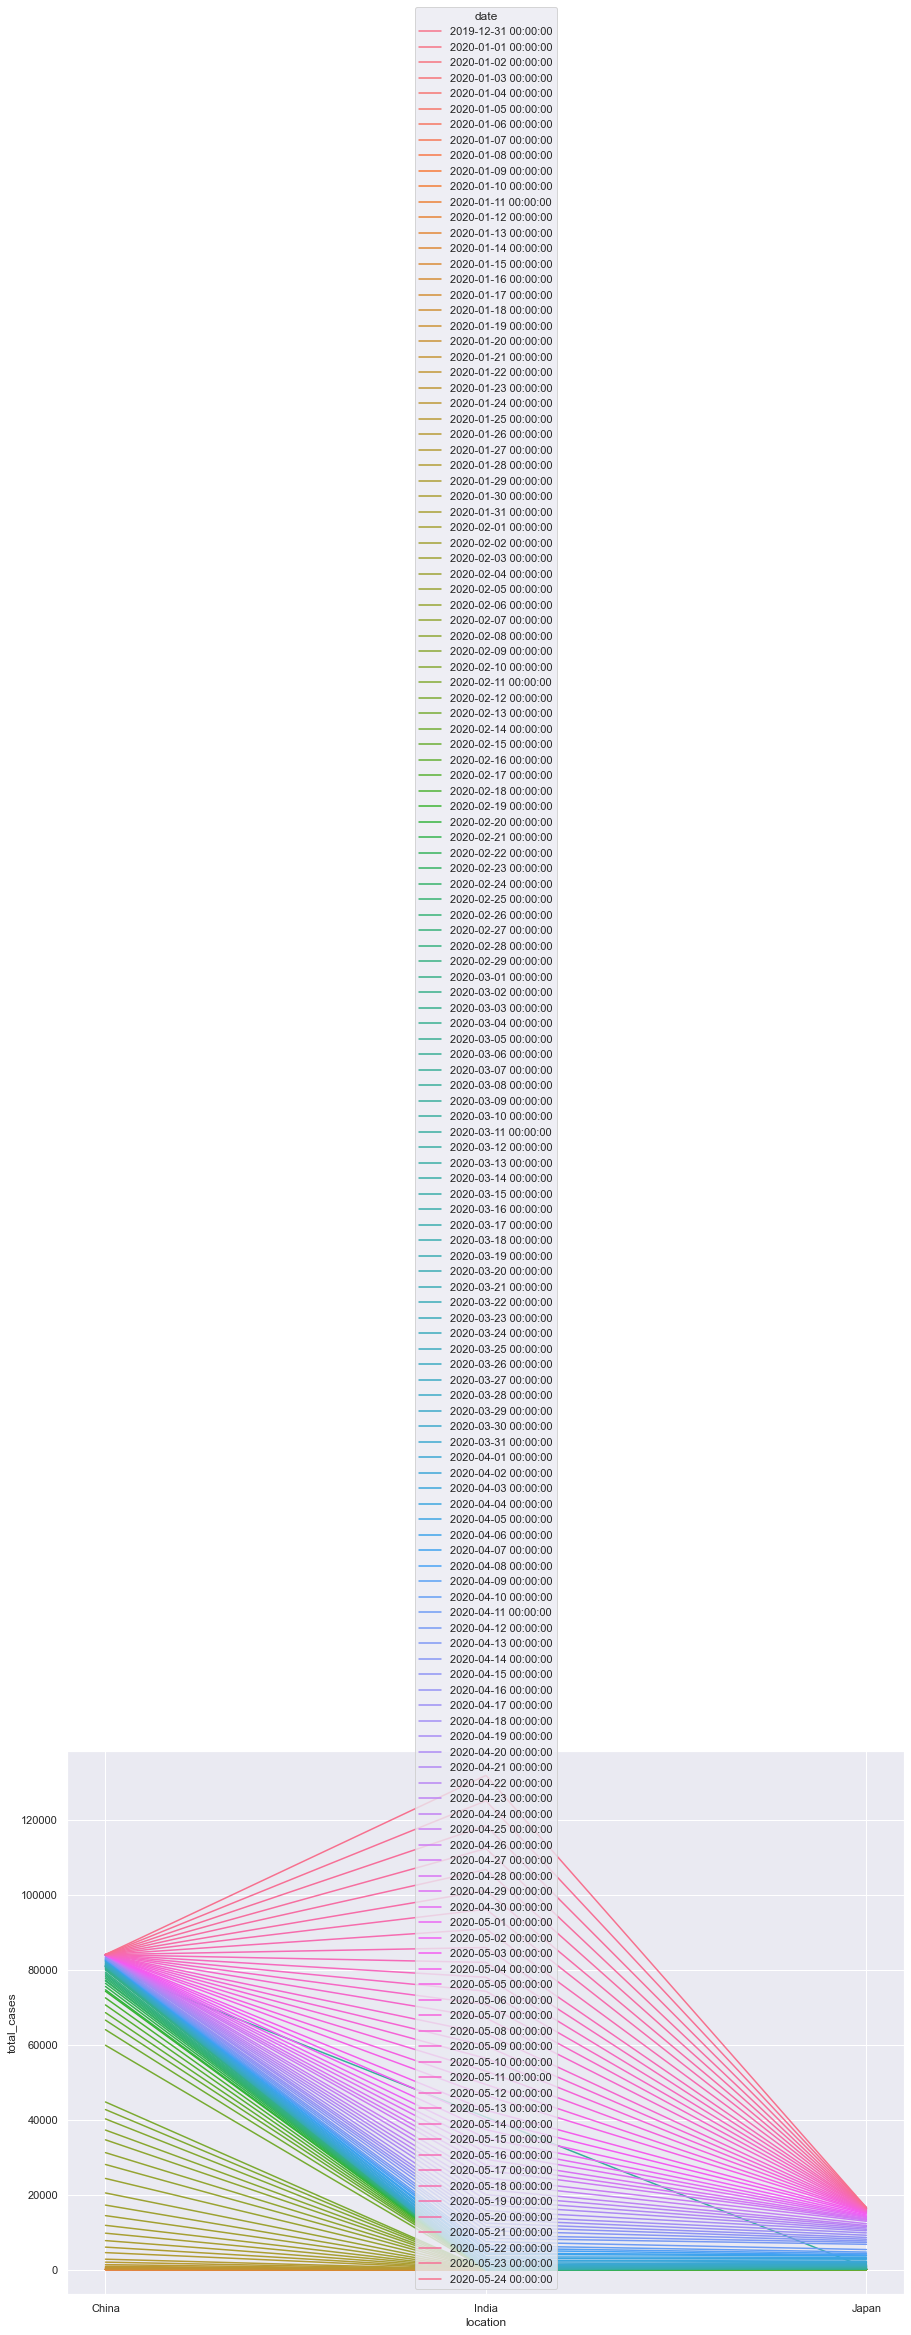

In [28]:
# Plotting the growth of cases across china , japan,india
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='location',y='total_cases',data=india_japan_china,hue="date")
plt.grid(True)
plt.show()

In [29]:
# Understanding cases of germony and spain
germony_spain=covid[(covid["location"]=="Germony") | (covid["location"]=="Spain") ]

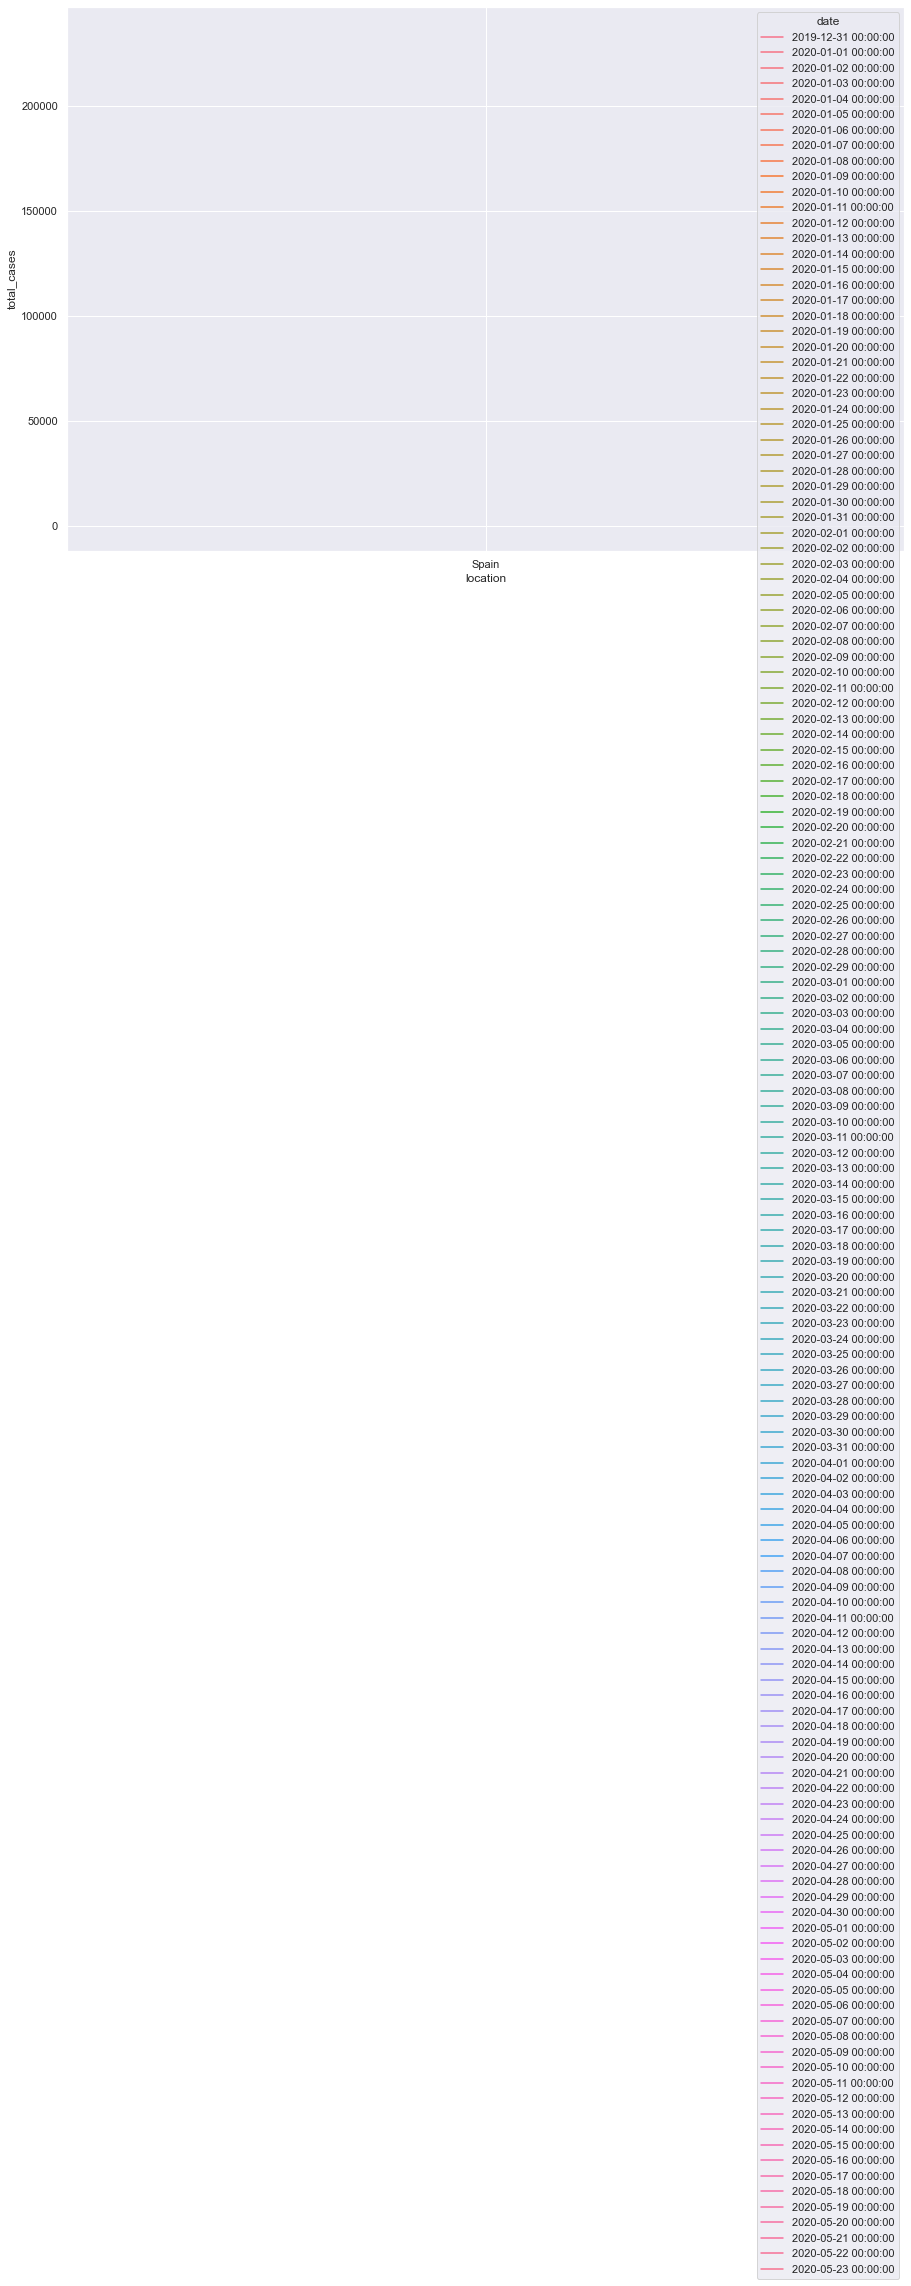

In [30]:
# Plotting the growth of cases across china , japan,india
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='location',y='total_cases',data=germony_spain,hue="date")
plt.grid(True)
plt.show()

# Linear Regression

In [31]:
india_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [32]:
# Converting the string date  to date-time
india_case['date']=pd.to_datetime(india_case['date'])
india_case.head()

C:\Users\Pranav\AppData\Local\Temp\ipykernel_2460\1535006745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_case['date']=pd.to_datetime(india_case['date'])


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [40]:
# Converting date-time to original
india_case['date']=india_case['date'].map(dt.datetime.toordinal)

C:\Users\Pranav\AppData\Local\Temp\ipykernel_2460\2887094185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_case['date']=india_case['date'].map(dt.datetime.toordinal)


In [41]:
X=india_case['date']
y=india_case['total_cases']

## Training and Test Data

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [43]:
print("shape of X_train= ",X_train.shape)
print("shape of X_test= ",X_test.shape)
print("shape of y_train= ",y_train.shape)
print("shape of y_test= ",y_test.shape)

shape of X_train=  (116,)
shape of X_test=  (29,)
shape of y_train=  (116,)
shape of y_test=  (29,)


##  Traing LinearRegression model


In [44]:
lr = LinearRegression()

In [45]:
lr

LinearRegression()

In [46]:
#Fit the model
lr.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [47]:
y_pred=lr.predict(np.array(X_test).reshape(-1,1))

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
mean_squared_error(X_test,y_pred)

519138428303.41003